Using device: cuda
======= Training All Models (One-Step-Ahead) =======

Training LSTM...
Early stopping triggered!
LSTM: Early stopping at epoch 48

Training GRU...
[GRU] Epoch 50/300 | Train Loss: 0.000148 | Val Loss: 0.000282
Early stopping triggered!
GRU: Early stopping at epoch 78

Training RNN...
[RNN] Epoch 50/300 | Train Loss: 0.000158 | Val Loss: 0.003806
[RNN] Epoch 100/300 | Train Loss: 0.000167 | Val Loss: 0.002658
[RNN] Epoch 150/300 | Train Loss: 0.000140 | Val Loss: 0.002181
[RNN] Epoch 200/300 | Train Loss: 0.000138 | Val Loss: 0.001824
[RNN] Epoch 250/300 | Train Loss: 0.000122 | Val Loss: 0.000331
Early stopping triggered!
RNN: Early stopping at epoch 288

Training CNN...
[CNN] Epoch 50/300 | Train Loss: 0.000134 | Val Loss: 0.000286
[CNN] Epoch 100/300 | Train Loss: 0.000166 | Val Loss: 0.000521
Early stopping triggered!
CNN: Early stopping at epoch 111

Training EnhancedLSTM...
[EnhancedLSTM] Epoch 50/300 | Train Loss: 0.003759 | Val Loss: 0.015240
[EnhancedLSTM] Ep

/tmp/ipykernel_1188306/1412581922.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_paths[mtype], map_location=device))


LSTM Validation MAPE: 2.91%
LSTM Test MAPE:       3.48%

--- Model: GRU ---


/tmp/ipykernel_1188306/1412581922.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_paths[mtype], map_location=device))


GRU Validation MAPE: 2.57%
GRU Test MAPE:       3.24%

--- Model: RNN ---


/tmp/ipykernel_1188306/1412581922.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_paths[mtype], map_location=device))


RNN Validation MAPE: 2.24%
RNN Test MAPE:       3.90%

--- Model: CNN ---


/tmp/ipykernel_1188306/1412581922.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_paths[mtype], map_location=device))


CNN Validation MAPE: 2.51%
CNN Test MAPE:       4.33%

--- Model: EnhancedLSTM ---


/tmp/ipykernel_1188306/1412581922.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_paths[mtype], map_location=device))


EnhancedLSTM Validation MAPE: 13.30%
EnhancedLSTM Test MAPE:       17.39%


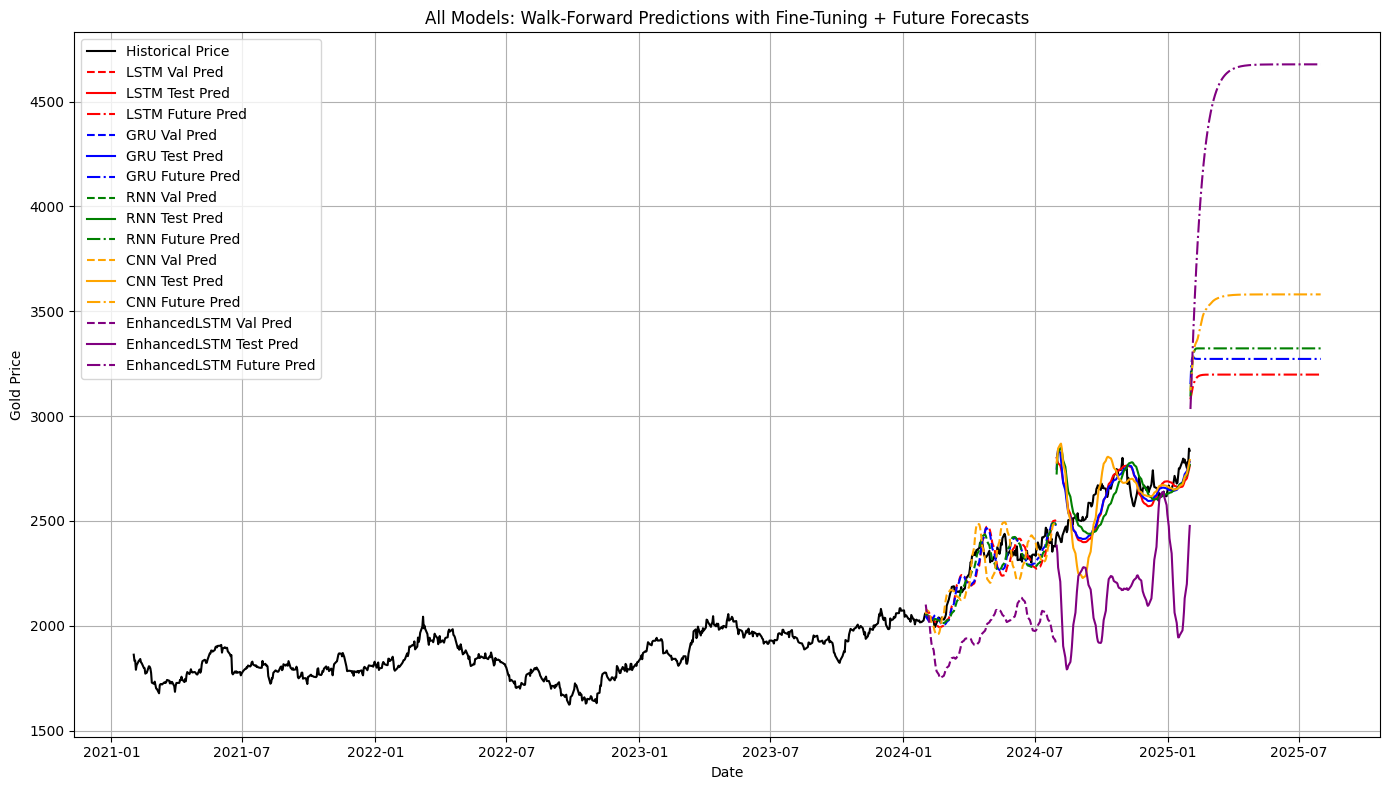

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import random
import os
import warnings

# ------------------------------------------------------------------
# 1) Reproducibility & Device Setup
# ------------------------------------------------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ------------------------------------------------------------------
# 2) Data Loading & Preprocessing
# ------------------------------------------------------------------
# Update CSV filename as needed
df = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Remove commas from numeric fields and convert to float
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True).astype('float64')

# Ensure no duplicates or missing values
assert df.duplicated().sum() == 0, "Duplicate rows found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# Features to use
features = ['Price','Open','High','Low']
data = df[features].values  # shape (N,4)

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)  # shape (N,4)

window_size = 30  # rolling window length (days)

# ------------------------------------------------------------------
# 3) Create Rolling Windows (X, y) + Date Array
# ------------------------------------------------------------------
X_all, Y_all, dates_all = [], [], []
for i in range(window_size, len(data_scaled)):
    X_all.append(data_scaled[i - window_size : i])  # shape (30,4)
    Y_all.append(data_scaled[i, 0])  # 'Price' is index 0
    dates_all.append(df['Date'].iloc[i])

X_all = np.array(X_all)     # shape (N, 30, 4)
Y_all = np.array(Y_all)     # shape (N,)
dates_all = np.array(dates_all)

# ------------------------------------------------------------------
# 4) Train / Validation / Test Split by Date
# ------------------------------------------------------------------
train_cutoff = pd.to_datetime('2024-02-01')
val_cutoff   = pd.to_datetime('2024-07-31')

train_mask = dates_all < train_cutoff
val_mask   = (dates_all >= train_cutoff) & (dates_all < val_cutoff)
test_mask  = dates_all >= val_cutoff

X_train, Y_train, train_dates = X_all[train_mask], Y_all[train_mask], dates_all[train_mask]
X_val,   Y_val,   val_dates   = X_all[val_mask],   Y_all[val_mask],   dates_all[val_mask]
X_test,  Y_test,  test_dates  = X_all[test_mask],  Y_all[test_mask],  dates_all[test_mask]

# Convert to torch Tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32)
Y_val_t   = torch.tensor(Y_val,   dtype=torch.float32).unsqueeze(1)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
Y_test_t  = torch.tensor(Y_test,  dtype=torch.float32).unsqueeze(1)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=batch_size, shuffle=False)
val_loader   = DataLoader(TensorDataset(X_val_t,   Y_val_t),   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_t,  Y_test_t),  batch_size=batch_size, shuffle=False)

# ------------------------------------------------------------------
# 5) Define Multiple Model Architectures
# ------------------------------------------------------------------
class BaseModel(nn.Module):
    """
    A single class that can instantiate LSTM, GRU, RNN, CNN, or EnhancedLSTM 
    based on 'model_type'.
    """
    def __init__(self, model_type='LSTM', input_size=4, hidden_size=128, num_layers=2, dropout=0.1):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout
            )
            self.fc = nn.Linear(hidden_size, 1)
            
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout
            )
            self.fc = nn.Linear(hidden_size, 1)
            
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                nonlinearity='relu',
                dropout=dropout
            )
            self.fc = nn.Linear(hidden_size, 1)
            
        elif model_type == 'CNN':
            # For CNN, we use 1D convolutions along the time dimension.
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=hidden_size, kernel_size=3)
            # Each Conv1d with kernel_size=3 reduces length by 2.
            self.conv_output_length = window_size - 2*(3-1)  # e.g. 30 - 4 = 26
            self.fc = nn.Linear(hidden_size * self.conv_output_length, 1)
            
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=hidden_size,
                num_layers=num_layers+1,  # one more layer
                batch_first=True,
                dropout=dropout*2
            )
            self.dropout = nn.Dropout(dropout*2)
            self.bn = nn.BatchNorm1d(hidden_size)
            self.fc = nn.Linear(hidden_size, 1)
            
        else:
            raise ValueError("Invalid model_type. Choose from ['LSTM','GRU','RNN','CNN','EnhancedLSTM'].")
    
    def forward(self, x):
        if self.model_type == 'CNN':
            # x: (batch, seq_len=30, input_size=4) -> (batch, 4, 30)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))  # shape: (batch,64,28)
            x = F.relu(self.conv2(x))  # shape: (batch, hidden_size, 26)
            x = x.reshape(x.size(0), -1)  # flatten: (batch, hidden_size*26)
            out = self.fc(x)
        elif self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]         # last time step
            out = self.bn(out)
            out = self.dropout(out)
            out = self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.fc(out)
        return out

# Dictionary for looping over models:
model_dict = {
    "LSTM": "LSTM",
    "GRU": "GRU",
    "RNN": "RNN",
    "CNN": "CNN",
    "EnhancedLSTM": "EnhancedLSTM"
}

# ------------------------------------------------------------------
# 6) Early Stopping
# ------------------------------------------------------------------
class EarlyStopping:
    def __init__(self, patience=30, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered!")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# ------------------------------------------------------------------
# 7) Inverse Transform for Price
# ------------------------------------------------------------------
def inverse_price_transform(scaled_prices):
    """
    scaled_prices: shape (N,) or (N,1).
    Fill placeholders for the other 3 features to use the same scaler.
    """
    scaled_prices = scaled_prices.reshape(-1, 1)
    zeros = np.zeros((scaled_prices.shape[0], len(features)-1))
    combined = np.hstack([scaled_prices, zeros])  # shape (N,4)
    inv = scaler.inverse_transform(combined)
    return inv[:, 0]  # return Price

# ------------------------------------------------------------------
# 8) Training Function for One-Step-Ahead
# ------------------------------------------------------------------
def train_model(model_name, input_size=4):
    """
    Train a model of type 'model_name' on the training set,
    validate on val_loader, with EarlyStopping.
    Returns the path to the saved best checkpoint.
    """
    model = BaseModel(model_type=model_name, input_size=input_size).to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=5e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=30)
    early_stopper = EarlyStopping(patience=30, min_delta=0.0)
    
    best_val_loss = float('inf')
    best_path = f"best_model_{model_name}.pt"
    
    epochs = 300
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        for Xb, Yb in train_loader:
            Xb, Yb = Xb.to(device), Yb.to(device)
            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, Yb)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        
        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for Xb, Yb in val_loader:
                Xb, Yb = Xb.to(device), Yb.to(device)
                val_preds = model(Xb)
                loss = criterion(val_preds, Yb)
                val_losses.append(loss.item())
        avg_val_loss = np.mean(val_losses)
        
        scheduler.step(avg_val_loss)
        early_stopper(avg_val_loss)
        if early_stopper.early_stop:
            print(f"{model_name}: Early stopping at epoch {epoch+1}")
            break
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_path)
        
        if (epoch+1) % 50 == 0:
            print(f"[{model_name}] Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")
    
    return best_path

# ------------------------------------------------------------------
# 9) Walk-Forward with Fine-Tuning (Incremental Updates)
# ------------------------------------------------------------------
def walk_forward_finetune(model, data_scaled, dates, start_idx, end_idx, window=30, epochs_per_update=1, lr=1e-4):
    """
    Walk-forward forecast from start_idx to end_idx-1:
      - Predict day t using previous (window) days (pure prediction; no cheating).
      - Once day t's actual price is available, perform a small incremental update.
      - Move to day t+1.
    
    Returns:
      preds_scaled: 1D numpy array of predicted (scaled) prices for days in [start_idx, end_idx)
      actual_scaled: 1D numpy array of actual (scaled) prices
      forecast_dates: numpy array of corresponding timestamps.
    """
    # Set up a small optimizer for incremental updates.
    inc_optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    
    model.eval()
    
    preds_scaled = []
    actual_scaled = []
    forecast_dates = []
    
    # Initialize the window using the last 'window' days (real data) before start_idx.
    current_window = data_scaled[start_idx - window : start_idx].copy()
    
    for t in range(start_idx, end_idx):
        # 1) Pure prediction for day t.
        X_in = torch.tensor(current_window, dtype=torch.float32).unsqueeze(0).to(device)  # shape: (1, window, 4)
        with torch.no_grad():
            y_pred_t = model(X_in).cpu().numpy().flatten()[0]
        preds_scaled.append(y_pred_t)
        forecast_dates.append(dates[t])
        
        # 2) Record actual scaled price for day t.
        y_true_t = data_scaled[t, 0]
        actual_scaled.append(y_true_t)
        
        # 3) Shift window forward: update only the Price column while preserving non-target features.
        current_window = current_window[1:]
        # Preserve non-target features from the last row.
        last_row = current_window[-1].copy()
        new_row = last_row.copy()
        new_row[0] = y_pred_t  # update only the Price
        current_window = np.vstack([current_window, new_row])
        
        # 4) Fine-tune with the new actual data.
        X_update = X_in  # shape: (1, window, 4)
        Y_update = torch.tensor([[y_true_t]], dtype=torch.float32, device=device)  # shape: (1,1)
        
        model.train()
        for _ in range(epochs_per_update):
            inc_optimizer.zero_grad()
            # For EnhancedLSTM (with BatchNorm), replicate X_update to simulate batch size > 1.
            if hasattr(model, 'model_type') and model.model_type == 'EnhancedLSTM':
                X_update_rep = X_update.repeat(2, 1, 1)
                Y_update_rep = Y_update.repeat(2, 1)
                out = model(X_update_rep)
                loss = loss_fn(out, Y_update_rep)
            else:
                out = model(X_update)
                loss = loss_fn(out, Y_update)
            loss.backward()
            inc_optimizer.step()
        model.eval()
    
    return np.array(preds_scaled), np.array(actual_scaled), np.array(forecast_dates)

# ------------------------------------------------------------------
# 10) Pure Recursive Forecasting for Future Predictions (No Online Updates)
# ------------------------------------------------------------------
def recursive_forecast_future(model, seed_window, horizon, window=30):
    """
    Forecast future predictions (pure recursive) for a given horizon.
    seed_window: numpy array of shape (window,4) used as initial input.
    horizon: number of days to forecast.
    """
    model.eval()
    current_window = seed_window.copy()
    preds = []
    for _ in range(horizon):
        X_in = torch.tensor(current_window, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            y_pred = model(X_in).cpu().numpy().flatten()[0]
        preds.append(y_pred)
        # Update window: drop oldest row; update only the Price column while preserving non-target features.
        current_window = current_window[1:]
        last_row = current_window[-1].copy()
        new_row = last_row.copy()
        new_row[0] = y_pred
        current_window = np.vstack([current_window, new_row])
    return np.array(preds)

# ------------------------------------------------------------------
# 11) Train All Models & Evaluate with Walk-Forward Fine-Tuning + Future Forecasts
# ------------------------------------------------------------------
model_types = ['LSTM', 'GRU', 'RNN', 'CNN', 'EnhancedLSTM']
best_paths = {}

print("======= Training All Models (One-Step-Ahead) =======")
for mtype in model_types:
    print(f"\nTraining {mtype}...")
    best_paths[mtype] = train_model(mtype, input_size=4)

# Full scaled data and corresponding date array.
data_scaled_full = data_scaled  # shape (N,4)
dates_full = df['Date'].values   # shape (N,)

# Determine indices for validation and test in the full data.
val_start_idx = np.where(dates_full == val_dates[0])[0][0] if len(val_dates) > 0 else None
val_end_idx   = np.where(dates_full == val_dates[-1])[0][0] + 1 if len(val_dates) > 0 else None
test_start_idx = np.where(dates_full == test_dates[0])[0][0] if len(test_dates) > 0 else None
test_end_idx   = np.where(dates_full == test_dates[-1])[0][0] + 1 if len(test_dates) > 0 else None

results = {}

print("\n======= Walk-Forward Predictions with Fine-Tuning =======")
for mtype in model_types:
    print(f"\n--- Model: {mtype} ---")
    # Load best checkpoint.
    model = BaseModel(model_type=mtype, input_size=4).to(device)
    model.load_state_dict(torch.load(best_paths[mtype], map_location=device))
    
    # Walk-forward on the Validation window.
    if val_start_idx is not None and val_end_idx is not None:
        val_preds_scaled, val_actual_scaled, val_forecast_dates = walk_forward_finetune(
            model,
            data_scaled_full,
            dates_full,
            start_idx=val_start_idx,
            end_idx=val_end_idx,
            window=window_size,
            epochs_per_update=1,
            lr=1e-4
        )
        val_preds_inv = inverse_price_transform(val_preds_scaled)
        val_actual_inv = inverse_price_transform(val_actual_scaled)
        val_mape = mean_absolute_percentage_error(val_actual_inv, val_preds_inv) * 100
        print(f"{mtype} Validation MAPE: {val_mape:.2f}%")
    else:
        val_preds_inv, val_actual_inv, val_forecast_dates = [], [], []
        val_mape = None
    
    # Walk-forward on the Test window.
    if test_start_idx is not None and test_end_idx is not None:
        test_preds_scaled, test_actual_scaled, test_forecast_dates = walk_forward_finetune(
            model,
            data_scaled_full,
            dates_full,
            start_idx=test_start_idx,
            end_idx=test_end_idx,
            window=window_size,
            epochs_per_update=1,
            lr=1e-4
        )
        test_preds_inv = inverse_price_transform(test_preds_scaled)
        test_actual_inv = inverse_price_transform(test_actual_scaled)
        test_mape = mean_absolute_percentage_error(test_actual_inv, test_preds_inv) * 100
        print(f"{mtype} Test MAPE:       {test_mape:.2f}%")
    else:
        test_preds_inv, test_actual_inv, test_forecast_dates = [], [], []
        test_mape = None
    
    # ------------------------------------------------------------------
    # Future Forecasting (Pure Recursive Predictions)
    # ------------------------------------------------------------------
    # Define Future mask period: 2025-02-01 to 2025-07-31.
    future_dates = pd.date_range(start='2025-02-01', end='2025-07-31', freq='D')
    horizon_future = len(future_dates)
    # Use the last available window from the full data as seed.
    seed_window = data_scaled_full[-window_size:].copy()  # shape (window,4)
    future_preds_scaled = recursive_forecast_future(model, seed_window, horizon_future, window=window_size)
    future_preds_inv = inverse_price_transform(future_preds_scaled)
    
    results[mtype] = {
        'val_forecast_dates': val_forecast_dates,
        'val_preds_inv': val_preds_inv,
        'val_actual_inv': val_actual_inv,
        'val_mape': val_mape,
        'test_forecast_dates': test_forecast_dates,
        'test_preds_inv': test_preds_inv,
        'test_actual_inv': test_actual_inv,
        'test_mape': test_mape,
        'future_forecast_dates': future_dates,
        'future_preds_inv': future_preds_inv
    }

# ------------------------------------------------------------------
# 12) Plot Results for Each Model
# ------------------------------------------------------------------
plt.figure(figsize=(14,8))
# Plot historical Price for reference.
plt.plot(dates_full, inverse_price_transform(data_scaled_full[:,0]), label='Historical Price', color='black')

colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'EnhancedLSTM': 'purple'
}

for mtype in model_types:
    # Plot Validation Predictions (dashed lines)
    if len(results[mtype]['val_forecast_dates']) > 0:
        plt.plot(results[mtype]['val_forecast_dates'],
                 results[mtype]['val_preds_inv'],
                 label=f"{mtype} Val Pred",
                 color=colors[mtype],
                 linestyle='--')
    # Plot Test Predictions (solid lines)
    if len(results[mtype]['test_forecast_dates']) > 0:
        plt.plot(results[mtype]['test_forecast_dates'],
                 results[mtype]['test_preds_inv'],
                 label=f"{mtype} Test Pred",
                 color=colors[mtype])
    # Plot Future Predictions (dash-dot lines)
    plt.plot(results[mtype]['future_forecast_dates'],
             results[mtype]['future_preds_inv'],
             label=f"{mtype} Future Pred",
             color=colors[mtype],
             linestyle='-.')
    
plt.title("All Models: Walk-Forward Predictions with Fine-Tuning + Future Forecasts")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
